## Install pytest

pytest requires: Python 3.7+ or PyPy3.

- Run the following command in your command line:
- Check that you installed the correct version:


In [2]:
# !pip install -U pytest
!pytest --version

pytest 8.1.1


## Create your first test

1. Create a new file called test_sample.py, containing a function, and a test:


In [3]:
# content of test_sample.py
def func(x):
    return x + 1


def test_answer():
    assert func(3) == 5

2. `pytest .\test_sample.py`

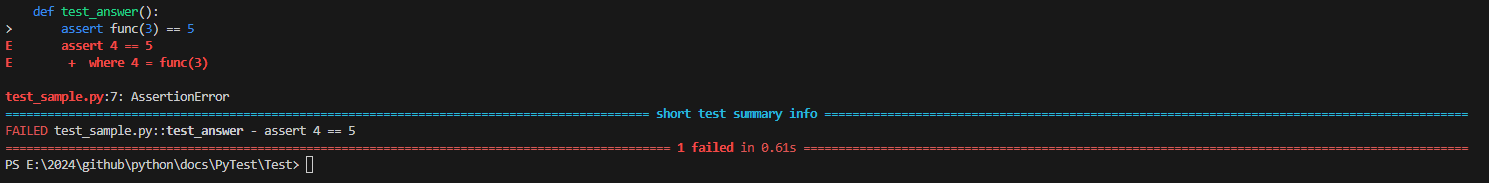


## Run multiple tests

- `pytest` will run all files of the form `test_*.py` or `*_test.py` in the current directory and its subdirectories.
  - More generally, it follows standard test discovery rules.

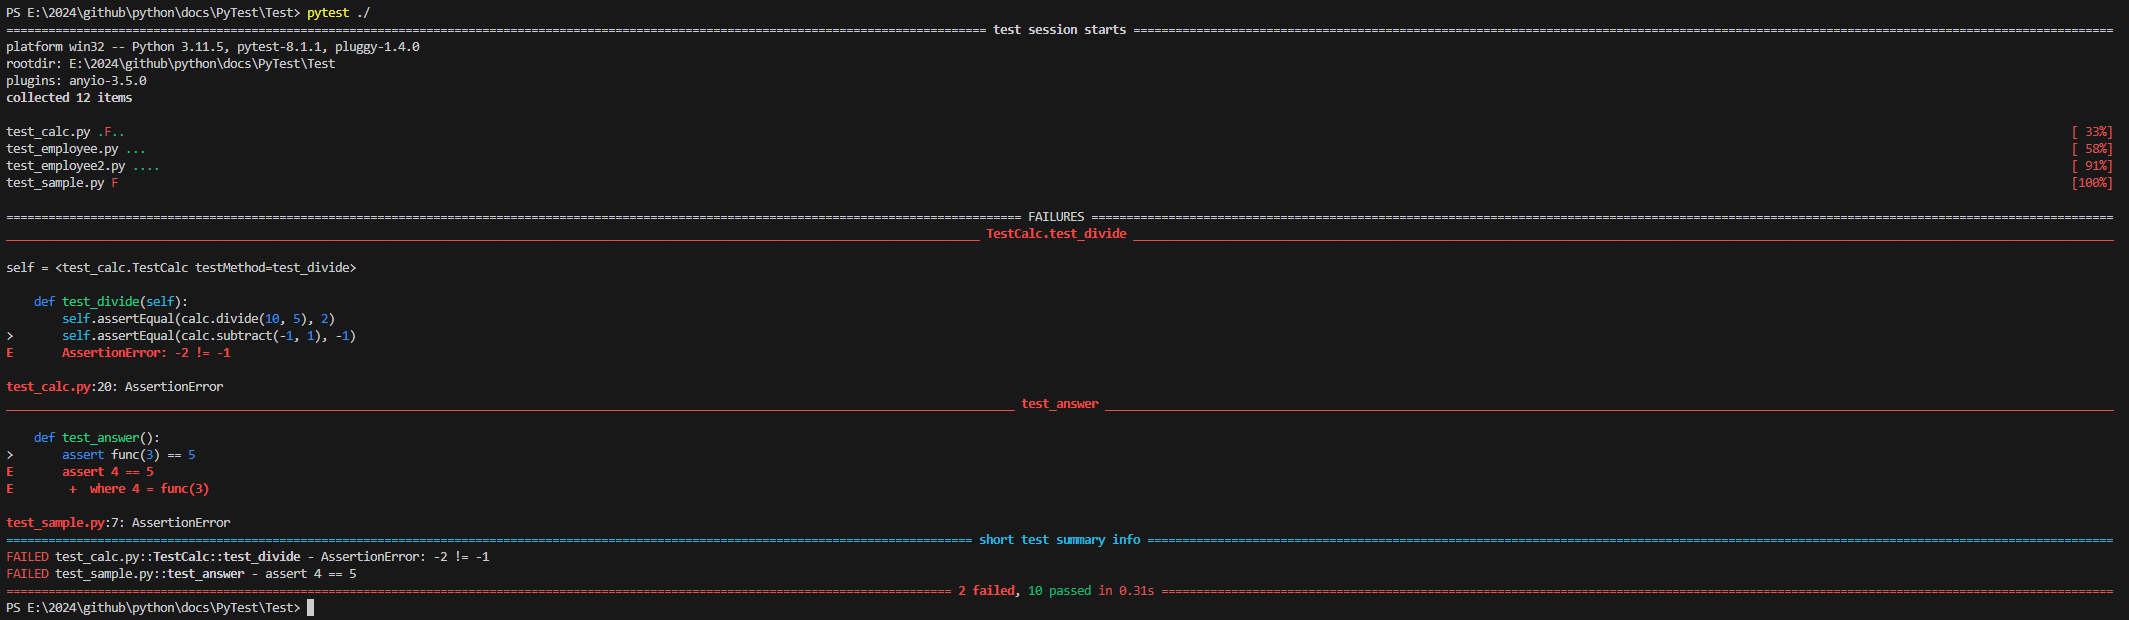


## Assert that a certain exception is raised

- Use the `raises` helper to assert that some code raises an exception:
- Execute the test function with `quiet` reporting mode:

  - The `-q/--quiet` flag keeps the output brief in this and following examples.
  - `pytest -q test_sysexit.py`

  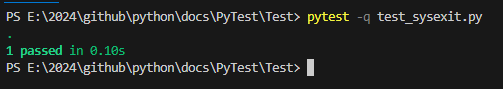


In [4]:
# content of test_sysexit.py
import pytest


def f():
    raise SystemExit(1)


def test_mytest():
    with pytest.raises(SystemExit):
        f()

## Group multiple tests in a class

Once you develop multiple tests, you may want to group them into a class. `pytest` makes it easy to create a class containing more than one test:

Grouping tests in classes can be beneficial for the following reasons:

- Test organization

- Sharing fixtures for tests only in that particular class

- Applying marks at the class level and having them implicitly apply to all tests


In [5]:
# content of test_class.py
class TestClass:
    def test_one(self):
        x = "this"
        assert "h" in x

    def test_two(self):
        x = "hello"
        assert hasattr(x, "check")

`pytest` discovers all tests following its Conventions for Python test discovery, so it finds both `test_` prefixed functions.

- **There is no need to subclass anything**, but make sure to prefix your class with `Test` otherwise the class will be skipped. We can simply run the module by passing its filename:

  - `pytest -q test_class.py`

  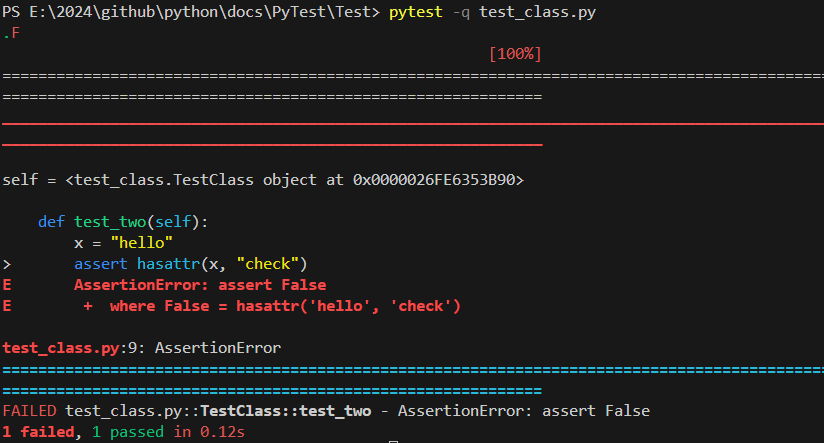

The first test passed and the second failed. You can easily see the intermediate values in the assertion to help you understand the reason for the failure.


Something to be **aware** of when grouping tests inside classes is that **each test has a unique instance of the class**.

- Having each test share the same class instance would be very detrimental to test isolation and would promote poor test practices.
  - Do not use bind instance variable!
- This is outlined below:


In [6]:
# content of test_class_demo.py
class TestClassDemoInstance:
    value = 0

    def test_one(self):
        self.value = 1
        assert self.value == 1

    def test_two(self):
        assert self.value == 1

`pytest -k TestClassDemoInstance -q`

- In the context of `pytest`, the `-k` option is used to filter test functions and classes **based on their names** using a substring matching.
  - use `pytest -k TestClassDemoInstance`, it means you are filtering for test functions or classes whose names contain `TestClassDemoInstance`.
- Note that attributes added at class level are `class attributes`, so they will be shared between tests.

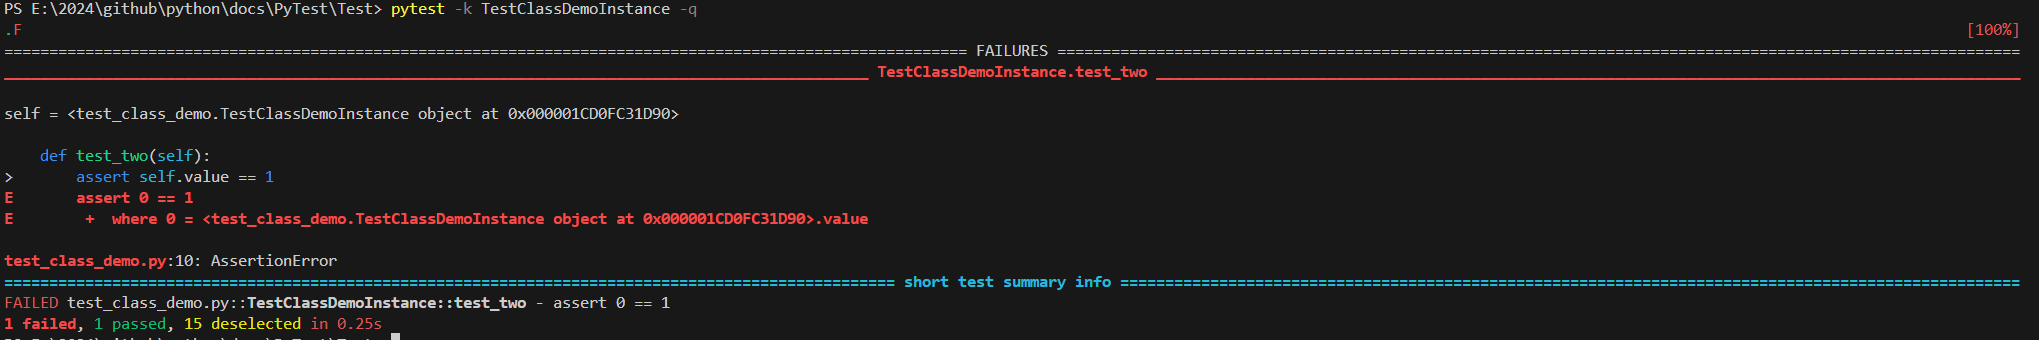


## `setup()` and `teardown()`

- use `pytest - s` to show the print info
- Create `shapes.py` for test


In [ ]:
import math

class Shape:
    def area(self):
        pass
    def perimeter(self):
        pass
    
class Circle(Shape):
    def __init__(self, radius) -> None:
        self.radius = radius
    
    def area(self):
        return math.pi * (self.radius**2)
    
    def perimeter(self):
        return 2 * math.pi * self.radius

- `test_circle.py`

```
import pytest
import math
import shapes

class TestCircle:
    def setup_method(self,method):
        print(f"Setting up {method}")
        self.circle = shapes.Circle(10)

    def teardown_method(self,method):
        print(f"Tear down method")
        del self.circle

    def test_area(self):
        assert self.circle.area() == math.pi * self.circle.radius ** 2

    def test_perimeter(self):
        assert self.circle.perimeter() == 2 * math.pi * self.circle.radius
```

- `pytest test_circle.py`

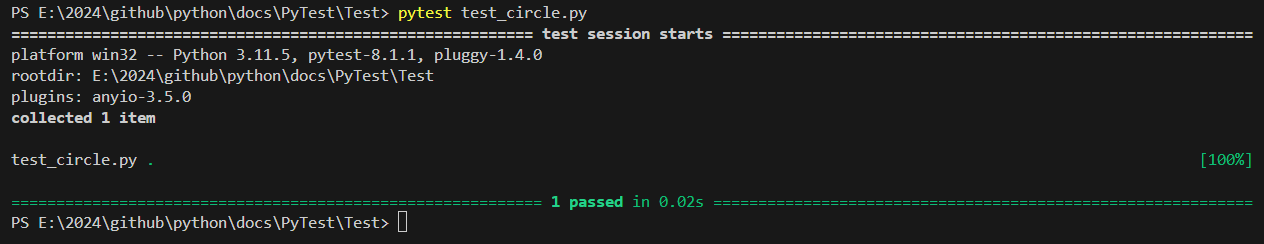


## Request a unique temporary directory for functional tests

- `pytest` provides Builtin fixtures/function arguments to request arbitrary resources, like a unique temporary directory:
- List the name `tmp_path` in the test function signature and `pytest` will lookup and call a `fixture factory` to create the resource before performing the test function call.
  - Before the test runs, `pytest` creates a `unique-per-test-invocation `temporary directory:
- The use of a unique temporary directory for functional tests, facilitated by `pytest`'s `tmp_path` fixture, helps ensure that each test **operates in an isolated environment**.


In [ ]:
# content of test_tmp_path.py
def test_needsfiles(tmp_path):
    print(tmp_path)
    assert 0

`pytest -q test_tmp_path.py`

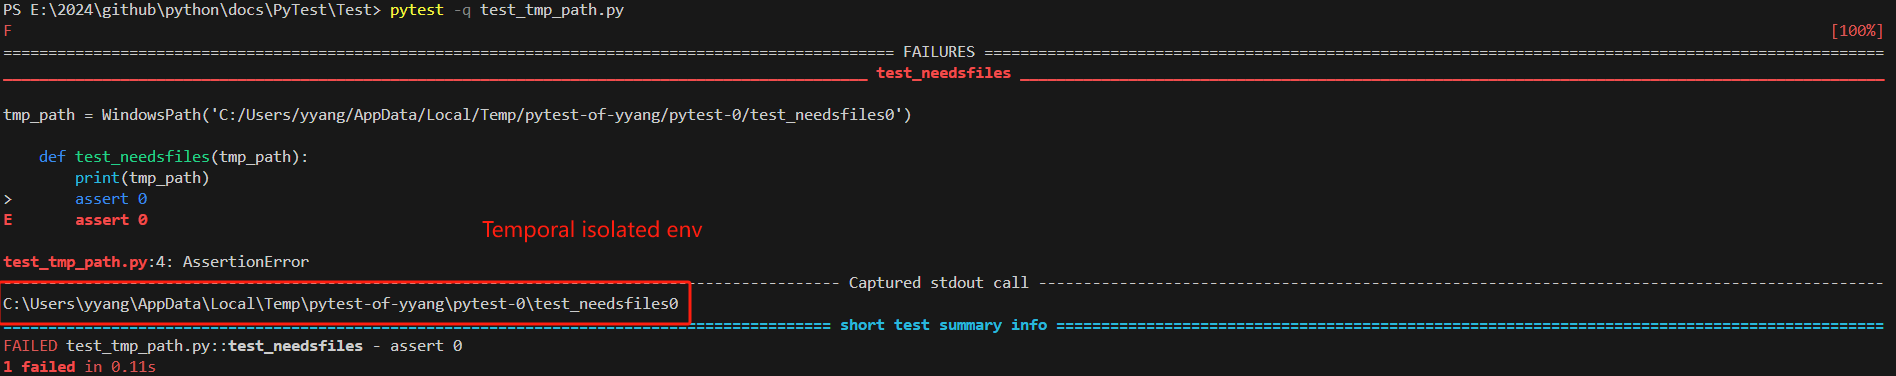
